In [1]:
import numpy as np
import pandas as pd

In [57]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras import Sequential

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Gain Insights in the datasets

In [4]:
train_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
test_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## Gain Insight Categorical Values

In [8]:
train_data["NObeyesdad"].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [9]:
train_data["Gender"].value_counts()

Female    10422
Male      10336
Name: Gender, dtype: int64

In [10]:
train_data["family_history_with_overweight"].value_counts()

yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64

In [11]:
train_data["FAVC"].value_counts()

yes    18982
no      1776
Name: FAVC, dtype: int64

In [12]:
train_data["CAEC"].value_counts()

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [13]:
train_data["SMOKE"].value_counts()

no     20513
yes      245
Name: SMOKE, dtype: int64

In [14]:
train_data["SCC"].value_counts()

no     20071
yes      687
Name: SCC, dtype: int64

In [15]:
train_data["CALC"].value_counts()

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

In [16]:
train_data["MTRANS"].value_counts()

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64

# Visualizing Data

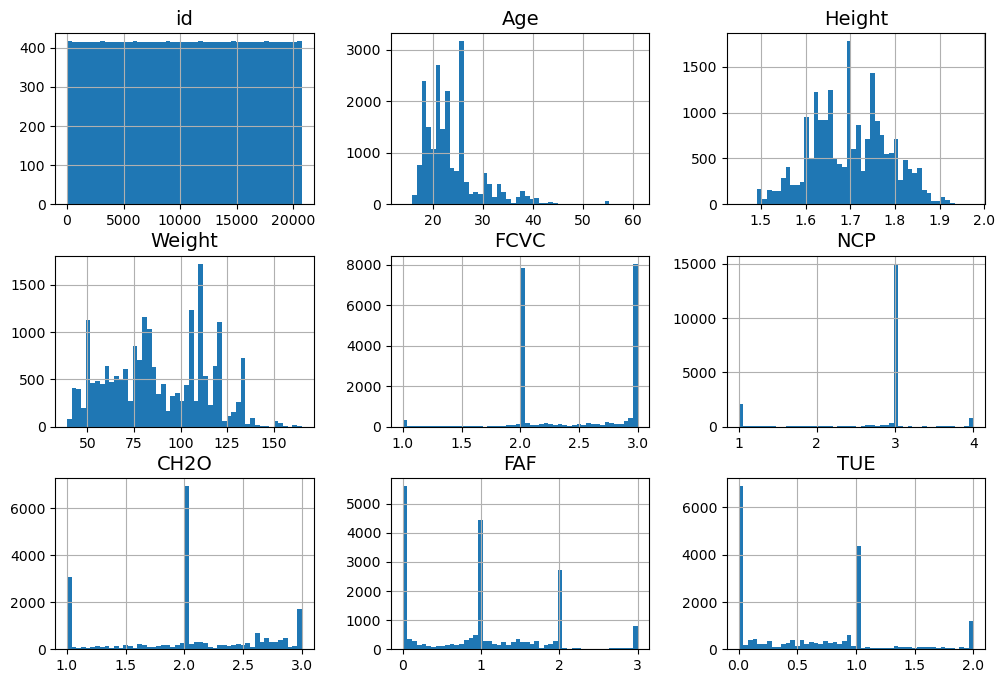

In [17]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_data.hist(bins=50, figsize=(12, 8))
plt.show()

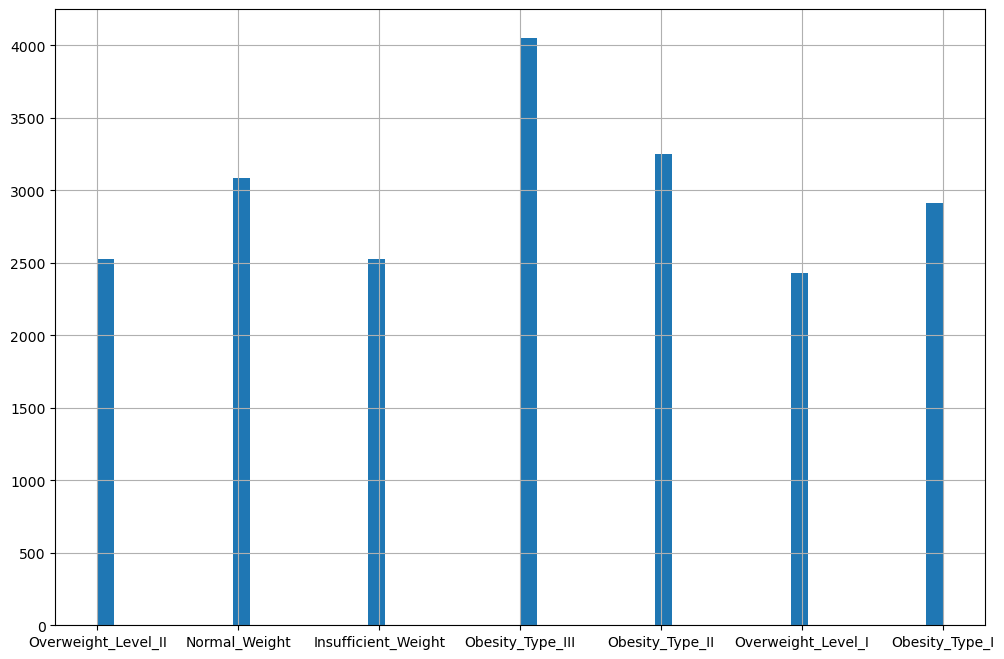

In [18]:
train_data["NObeyesdad"].hist(bins=50, figsize=(12, 8))
plt.show()

# Data Preprocessing 

In [19]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

## Transform from pandas dataframe to numpy array

In [20]:
train_num = train_data.to_numpy()
y_train = train_num[:, -1]

## Process labels

In [21]:
labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)

# Get the mapping between original labels and encoded integer values
label_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

print("Label mapping:")
for label, encoded_value in label_mapping.items():
    print(f"{label} : {encoded_value}")

Label mapping:
Insufficient_Weight : 0
Normal_Weight : 1
Obesity_Type_I : 2
Obesity_Type_II : 3
Obesity_Type_III : 4
Overweight_Level_I : 5
Overweight_Level_II : 6


## Pipeline For Numerical Attributes

In [22]:
num_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

## Pipeline For Categorical Attributes

In [23]:
cat_pipeline = Pipeline([
    ("cat_encoder", OrdinalEncoder()),
])

## Join the Pipelines

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
cat_attribs = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [25]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

array([[ 1.05698568e-01, -2.82826384e-03, -2.35712640e-01, ...,
         0.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       [-1.02705190e+00, -1.60629083e+00, -1.17093118e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [-1.02705190e+00,  1.28451382e-01, -1.43001211e+00, ...,
         0.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       ...,
       [-6.57668988e-01,  1.36653688e+00,  6.70717298e-01, ...,
         0.00000000e+00,  2.00000000e+00,  3.00000000e+00],
       [ 1.76006735e+00, -2.80535690e-03, -1.65574406e-01, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [ 4.99051344e-01,  1.33206194e+00,  1.14664506e+00, ...,
         0.00000000e+00,  1.00000000e+00,  3.00000000e+00]])

In [26]:
X_train.shape[1]

16

In [27]:
y_train

array([6, 1, 0, ..., 3, 6, 3])

In [28]:
X_test = preprocess_pipeline.fit_transform(test_data)
X_test

array([[ 0.50816334,  1.68278868,  1.27378625, ...,  0.        ,
         2.        ,  3.        ],
       [-0.50912784, -1.11465762, -0.81898841, ...,  0.        ,
         2.        ,  3.        ],
       [ 0.35299999, -0.62619119,  0.92743153, ...,  0.        ,
         2.        ,  3.        ],
       ...,
       [-0.17537884, -1.27749479, -1.64712469, ...,  0.        ,
         2.        ,  3.        ],
       [-0.50912784, -0.88932424, -1.31686525, ...,  0.        ,
         3.        ,  3.        ],
       [ 0.43764818,  1.27679426,  1.28666709, ...,  0.        ,
         2.        ,  3.        ]])

In [29]:
X_test.shape[1]

16

# Train Model

## 1. KNeighbors Classifier 

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
knn_scores.mean()

0.766740279035216

## 2. Random Forest Classifier 

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.9003756529006198

In [36]:
# Get label
rev_label = {}
for i in label_mapping.keys():
    rev_label[label_mapping[i]] = i

## 3. SVM

In [38]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8763851010980337

## 4. XGBoost

In [70]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [71]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [72]:
xgb_scores = cross_val_score(xgb_clf, X_train, y_train, cv=10)
xgb_scores.mean()

0.9051450425981382

In [73]:
y_pred = xgb_clf.predict(X_test)

In [74]:
output = pd.DataFrame({"id": test_data.id, "NObeyesdad": [rev_label[i] for i in y_pred]})
output.to_csv('submission.csv', index=False)